In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
from PIL import Image
from skimage.feature import hog

from sneakers_ml.features.features import save_features
from sneakers_ml.features.hog import get_hog_features

/home/seara/.cache/pypoetry/virtualenvs/sneakers-ml-hflTz_mY-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
dataset_name = "brands-classification-splits"
dataset_path = Path("data/training/") / dataset_name
for folder in ["train", "test", "val"]:
    split_path = str(dataset_path / folder)

    features, classes, class_to_idx = get_hog_features(split_path)
    save_path = str(Path("data") / "features" / "hog" / f"{dataset_name}-{folder}.pickle")
    save_features(save_path, features, classes, class_to_idx)


dataset_name = "brands-classification-full"
dataset_path = Path("data/training/") / dataset_name

features, classes, class_to_idx = get_hog_features(dataset_path)
save_path = str(Path("data") / "features" / "hog" / f"{dataset_name}.pickle")
save_features(save_path, features, classes, class_to_idx)

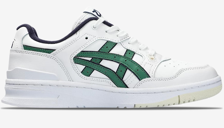

In [10]:
image = "data/merged/images/by-brands/asics/0.jpeg"

img = Image.open("data/merged/images/by-brands/asics/0.jpeg")
img = img.resize((256, 256))


width, height = img.size
crop_sides = 224
crop_top_bot = 128
left = (width - crop_sides) / 2
top = (height - crop_top_bot) / 2
right = (width + crop_sides) / 2
bottom = (height + crop_top_bot) / 2

img = img.crop((left, top, right, bottom))
img

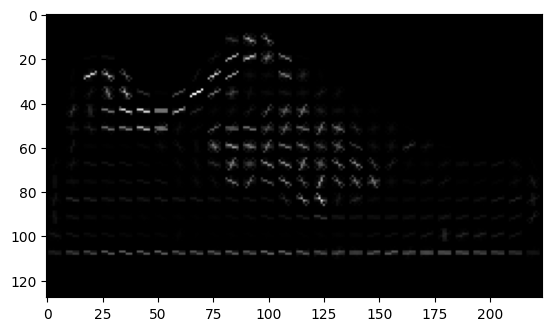

In [11]:
fd, hog_image = hog(
    img,
    orientations=8,
    pixels_per_cell=(8, 8),
    cells_per_block=(1, 1),
    visualize=True,
    channel_axis=-1,
    transform_sqrt=True,
)
plt.imshow(hog_image, cmap=plt.cm.gray)

In [4]:
fd.shape

(8192,)